# Exercise 12.1 #

In [1]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
plt.rcParams["figure.figsize"] = (9.5,6)

In [3]:
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

## Importing data ##

In [4]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 

# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [25]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('Training data: ',len(X_train))
print('Validation data: ',len(X_test))

Training data:  60000
Validation data:  10000


## Models construction and training##

In [21]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [7]:
# training parameters
batch_size = 32
epochs = 5

### SGD ###

In [8]:
# create the deep neural net
model_SGD = create_DNN()

model_SGD.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])

# train DNN and store training info in history
history_SGD = model_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.7562 - acc: 0.7782 - val_loss: 0.3098 - val_acc: 0.9182
Epoch 2/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.3795 - acc: 0.8923 - val_loss: 0.2349 - val_acc: 0.9345
Epoch 3/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.3057 - acc: 0.9134 - val_loss: 0.1996 - val_acc: 0.9410
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.2666 - acc: 0.9258 - val_loss: 0.1728 - val_acc: 0.9493
Epoch 5/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.2329 - acc: 0.9344 - val_loss: 0.1541 - val_acc: 0.9537


### Adam ###

In [9]:
# create the deep neural net
model_Adam = create_DNN()

model_Adam.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

# train DNN and store training info in history
history_Adam = model_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.2828 - acc: 0.9175 - val_loss: 0.1206 - val_acc: 0.9639
Epoch 2/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.1210 - acc: 0.9650 - val_loss: 0.0791 - val_acc: 0.9758
Epoch 3/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.0886 - acc: 0.9745 - val_loss: 0.0753 - val_acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.0674 - acc: 0.9801 - val_loss: 0.0827 - val_acc: 0.9772
Epoch 5/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0556 - acc: 0.9832 - val_loss: 0.0865 - val_acc: 0.9757


### Adadelta###

In [13]:
# create the deep neural net
model_Adadelta = create_DNN()

model_Adadelta.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])

# train DNN and store training info in history
history_Adadelta = model_Adadelta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.2858 - acc: 0.9171 - val_loss: 0.1147 - val_acc: 0.9662
Epoch 2/5
60000/60000 [==============================] - 17s 289us/step - loss: 0.1263 - acc: 0.9641 - val_loss: 0.0922 - val_acc: 0.9719
Epoch 3/5
60000/60000 [==============================] - 18s 301us/step - loss: 0.0927 - acc: 0.9739 - val_loss: 0.0799 - val_acc: 0.9771
Epoch 4/5
60000/60000 [==============================] - 18s 295us/step - loss: 0.0759 - acc: 0.9790 - val_loss: 0.0772 - val_acc: 0.9784
Epoch 5/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.0646 - acc: 0.9819 - val_loss: 0.0772 - val_acc: 0.9799


## Performance ##

DNN score with SGD:
10000/10000 [==============================] - 1s 77us/step
Test loss: 0.154
Test accuracy: 0.954

DNN score with Adam:
10000/10000 [==============================] - 1s 64us/step
Test loss: 0.087
Test accuracy: 0.976

DNN score with Adadelta:
10000/10000 [==============================] - 1s 62us/step
Test loss: 0.077
Test accuracy: 0.980


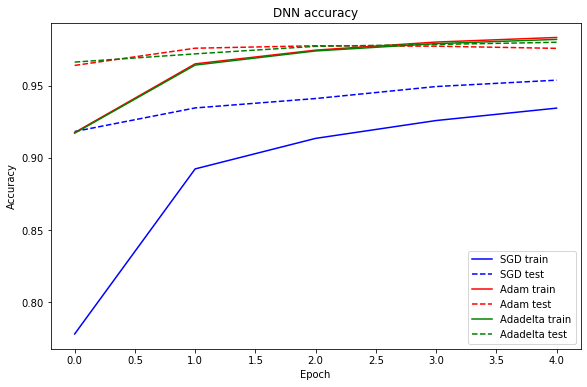

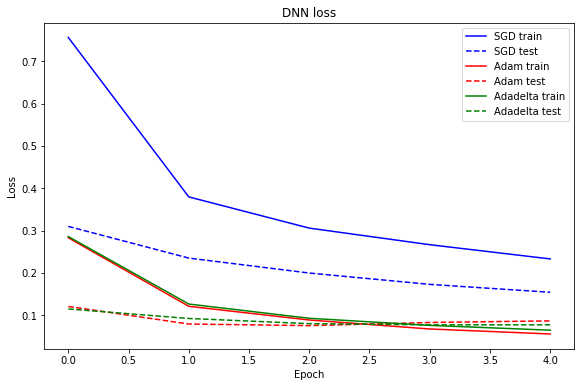

In [23]:
# evaluate model
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# print performance
print('DNN score with SGD:')
score_SGD = model_SGD.evaluate(X_test, Y_test, verbose=1)
print('Test loss: {0:.3f}'.format(score_SGD[0]))
print('Test accuracy: {0:.3f}'.format(score_SGD[1]))

print('\nDNN score with Adam:')
score_Adam = model_Adam.evaluate(X_test, Y_test, verbose=1)
print('Test loss: {0:.3f}'.format(score_Adam[0]))
print('Test accuracy: {0:.3f}'.format(score_Adam[1]))

print('\nDNN score with Adadelta:')
score_Adadelta = model_Adadelta.evaluate(X_test, Y_test, verbose=1)
print('Test loss: {0:.3f}'.format(score_Adadelta[0]))
print('Test accuracy: {0:.3f}'.format(score_Adadelta[1]))
# look into training history

# summarize history for accuracy
plt.plot(history_SGD.history['acc'], label='SGD train', color='b')
plt.plot(history_SGD.history['val_acc'],label='SGD test', color='b', linestyle='--')
plt.plot(history_Adam.history['acc'], label='Adam train', color='r')
plt.plot(history_Adam.history['val_acc'],label='Adam test', color='r',linestyle='--')
plt.plot(history_Adadelta.history['acc'], label='Adadelta train', color='g')
plt.plot(history_Adadelta.history['val_acc'],label='Adadelta test', color='g',linestyle='--')
plt.ylabel('Accuracy')
plt.title('DNN accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# summarize history for loss
plt.plot(history_SGD.history['loss'], label='SGD train', color='b')
plt.plot(history_SGD.history['val_loss'],label='SGD test', color='b', linestyle='--')
plt.plot(history_Adam.history['loss'], label='Adam train', color='r')
plt.plot(history_Adam.history['val_loss'],label='Adam test', color='r',linestyle='--')
plt.plot(history_Adadelta.history['loss'], label='Adadelta train', color='g')
plt.plot(history_Adadelta.history['val_loss'],label='Adadelta test', color='g',linestyle='--')
plt.ylabel('Loss')
plt.title('DNN loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Predictions ##

### Test data ###

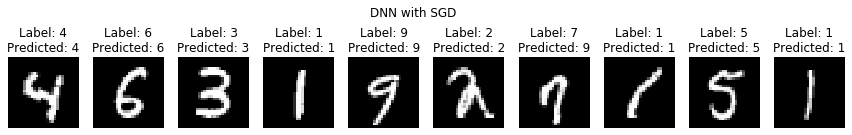

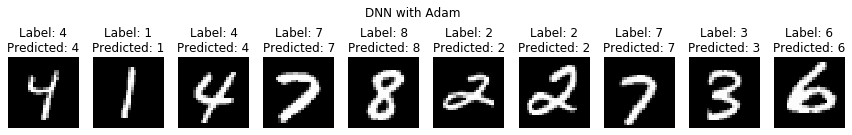

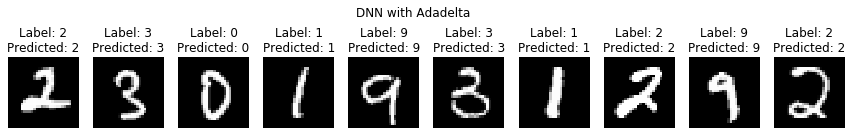

In [24]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

predictions_SGD = model_SGD.predict(X_test)
predictions_Adam = model_Adam.predict(X_test)
predictions_Adadelta = model_Adadelta.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1) 
    k = np.random.randint(0,len(X_test)) +50
    plt.imshow(X_test[k, :, :, 0], cmap='gray')    
    plt.title("Label: {0}\nPredicted: {1}".format(np.argmax(Y_test[k]), np.argmax(predictions_SGD[k])))    
    plt.axis('off') 
plt.suptitle('DNN with SGD')
plt.show()

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1) 
    k = np.random.randint(0,len(X_test))
    plt.imshow(X_test[k, :, :, 0], cmap='gray')    
    plt.title("Label: {0}\nPredicted: {1}".format(np.argmax(Y_test[k]), np.argmax(predictions_Adam[k])))    
    plt.axis('off') 
plt.suptitle('DNN with Adam')
plt.show()

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1) 
    k = np.random.randint(0,len(X_test))
    plt.imshow(X_test[k, :, :, 0], cmap='gray')    
    plt.title("Label: {0}\nPredicted: {1}".format(np.argmax(Y_test[k]), np.argmax(predictions_Adadelta[k])))    
    plt.axis('off') 
plt.suptitle('DNN with Adadelta')
plt.show()

### My handwritten digits ###

In [16]:
import matplotlib.image as mpimg
mydigit = []
for i in range(10):
    filename = "./my_digits/"+str(i)+".png"
    mydigit.append(mpimg.imread(filename))

mydigit = np.array(mydigit,  dtype='float32')
print(mydigit.shape)

(10, 28, 28)


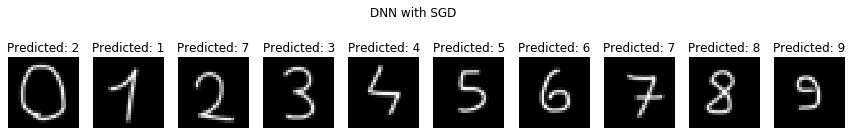

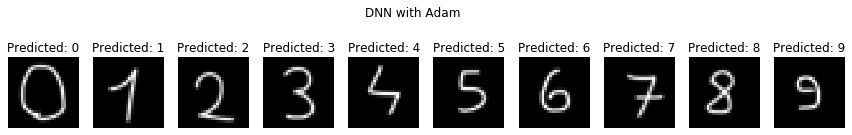

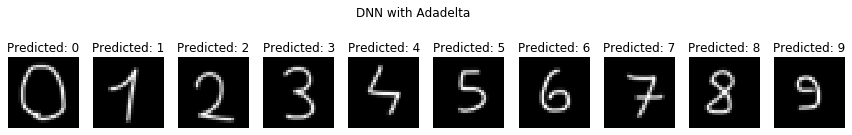

In [18]:
mydigit = mydigit.reshape(mydigit.shape[0], img_rows*img_cols)

mypredictions_SGD = model_SGD.predict(mydigit)
mypredictions_Adam = model_Adam.predict(mydigit)
mypredictions_Adadelta = model_Adadelta.predict(mydigit)

mydigit= mydigit.reshape(mydigit.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(mydigit[i, :, :,0], cmap='gray')    
    plt.title("Predicted: {0}".format(np.argmax(mypredictions_SGD[i])))    
    plt.axis('off')
plt.suptitle('DNN with SGD')
plt.show()

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(mydigit[i, :, :,0], cmap='gray')    
    plt.title("Predicted: {0}".format(np.argmax(mypredictions_Adam[i])))    
    plt.axis('off')
plt.suptitle('DNN with Adam')
plt.show()

plt.figure(figsize=(15, 2.5)) 
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(mydigit[i, :, :,0], cmap='gray')    
    plt.title("Predicted: {0}".format(np.argmax(mypredictions_Adadelta[i])))    
    plt.axis('off')
plt.suptitle('DNN with Adadelta')
plt.show()

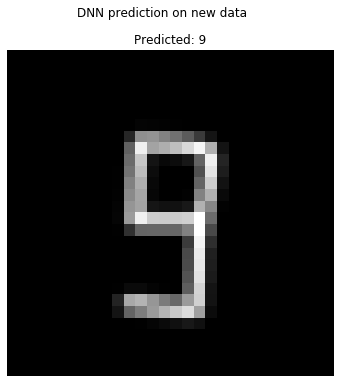

In [19]:
test_digit = mpimg.imread("./my_digits/digit.png")
test_digit = np.array(test_digit,  dtype='float32')

test_digit = test_digit.reshape(1, img_rows*img_cols)

test_pred = model_Adadelta.predict(test_digit)

test_digit= test_digit.reshape(1,img_rows, img_cols,1)

plt.imshow(test_digit[0,:,:,0], cmap='gray')    
plt.title("Predicted: {0}".format(np.argmax(test_pred)))    
plt.axis('off')
plt.suptitle('DNN prediction on new data')
plt.show()

## Comparison ##
The above three DNN model differ only in the choice of the optimizer.

|    Optimizer   	|       Loss     	|      Accuracy    	|    Total time  (s)	|  Average time (s/epoch)	| Size (MB) |
|:----:	|:-------:	|:-----:|:---: |:----:|:----:|
| SGD  	|   0.154	| 0.954 | 52 | 10.4 | 2.9 |
| Adam 	| 0.087	|  0.976 	| 87 | 17.4 | 4.3 |
| Adadelta | 0.077 | 0.980  | 90 | 18.0 | 4.3 |

The best performance is achieved by _Adadelta_, closely followed by _Adam_, while _SGD_ is a little behind. 
However generic _SGD_, while achiving less accurate results, is significantly faster than the more complex _Adam_ and _Adadelta_.

Besides, the models that uses _Adam_ and _Adadelta_ are much expensive in terms of occupied memory on disk. 

So, litimiting the comparison to these naive facts, we can say that _SGD_ is less computationally expensive at the cost of being less accurate than the other tested optimizers.

Finally, despite the outlined differences in performances, the three models are not appreciably different in their predictive power: from the tests carried out emerged only that sometimes _SGD_ fails to succesfully predict some digits.

## Models saving ##

In [20]:
model_SGD.save(filepath="./DNN_SGD.model", include_optimizer=True)
model_Adam.save(filepath="./DNN_Adam.model", include_optimizer=True)
model_Adadelta.save(filepath="./DNN_Adadelta.model", include_optimizer=True)